In [85]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from main import findAns,readExamples
import tracemalloc
import time

In [87]:
rec = pd.read_csv('resultsNaN.csv')
rec.head()

,DFSTime,BFSTime,IDSTime,UCSTime,AstarTime,DFSMemory,BFSMemory,IDSMemory,UCSMemory,AstarMemory
0,4.003,0.161,0.828,0.167,0.191,0.036514,0.029240,0.025651,0.023544,0.024736
1,7.962,0.353,1.049,0.476,0.664,0.028320,0.155827,0.020100,0.138411,0.147155
2,1.926,0.127,0.789,0.116,0.135,0.014536,0.006056,0.016320,0.006016,0.006256
3,4.435,0.144,0.977,0.203,0.227,0.014608,0.027712,0.011824,0.027872,0.029464
4,5.155,0.122,0.899,0.127,0.133,0.012848,0.008408,0.011416,0.008408,0.009331


In [56]:
examples = readExamples()
ans = pd.read_csv('answersNaN.csv')
rec = pd.read_csv('resultsNaN.csv')

notFound = False
for i in range(0,50):
    for j in range(0,5):
        max_depht = 30
        if np.isnan(rec.iloc[i,j]):
            print(i,j)
            while rec.iloc[i,j] == None or np.isnan(rec.iloc[i,j]) or rec.iloc[i,j] == math.inf:
                startTime = time.time()
                if j == 0:
                    tracemalloc.start()
                    act = findAns('DFS',examples[i],max_depht) 
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 100        
                if j == 1:
                    tracemalloc.start()
                    act = findAns('BFS',examples[i],max_depht)
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 100
                if j == 2:
                    tracemalloc.start()
                    act = findAns('IDS',examples[i],max_depht)
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 100
                if j == 3:
                    tracemalloc.start()
                    act = findAns('UCS',examples[i],max_depht)
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 100
                if j == 4:
                    tracemalloc.start()
                    act = findAns('Astar',examples[i],max_depht)
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 500
                exetime = time.time() - startTime
                print(exetime,max_depht)
                if exetime > 120 or max_depht > 1500:
                    notFound = True
                    break
            if notFound:
                rec.iloc[i,j] = np.nan
                rec.iloc[i,j+5] = np.nan
                notFound = False
            else:
                print('found')
                ans.iloc[i,j] = act
                rec.iloc[i,j] = exetime
                rec.iloc[i,j+5] = peak / 10**6 - 8000
            rec.to_csv('resultsNan.csv',index=False)
            ans.to_csv('answersNan.csv',index=False)


31 4
1.6655502319335938 530
8.003068208694458 1030
8.337047100067139 1530
32 4
0.7708728313446045 530
2.633721351623535 1030
2.686131715774536 1530
33 3
15.103895425796509 130
14.857467412948608 230
15.114933013916016 330
14.930773258209229 430
15.281507968902588 530
14.304700374603271 630
14.019557237625122 730
14.131061315536499 830
14.07396149635315 930
14.691717624664307 1030
15.574203252792358 1130
13.978351831436157 1230
13.902074337005615 1330
16.997122526168823 1430
15.739330053329468 1530
33 4
1.367842197418213 530
29.617908716201782 1030
29.536513805389404 1530
34 0
12.06760025024414 130
12.670254230499268 230
23.051350355148315 330
1.9120347499847412 430
34.73767828941345 530
3.0558278560638428 630
33.6660840511322 730


KeyboardInterrupt: 

In [89]:
ans = pd.read_csv('answersNan.csv') 

In [90]:
for i in range(0,5):
    print(f'Algorithm {i} has {rec.iloc[:,i].isna().sum()} answers')


Algorithm 0 has 14 answers
Algorithm 1 has 1 answers
Algorithm 2 has 12 answers
Algorithm 3 has 18 answers
Algorithm 4 has 20 answers


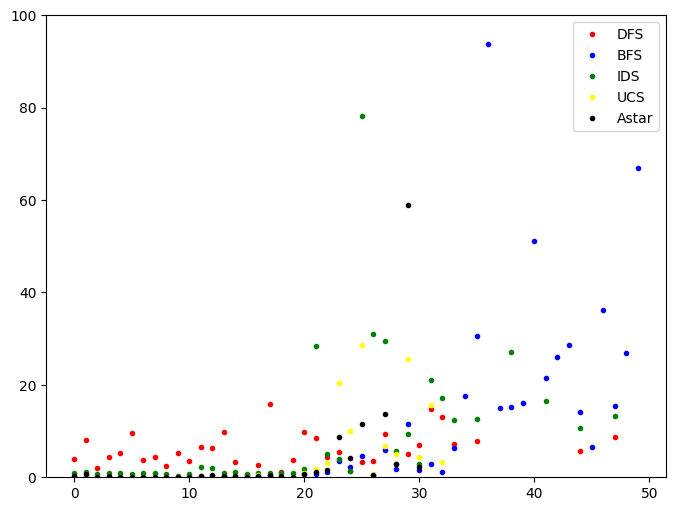

In [91]:
plt.figure(figsize=(8,6))
plt.ylim(0, 100)
# plt.xlim(20, 50)
plt.plot(rec.iloc[:,0], '.', color='red')
plt.plot(rec.iloc[:,1], '.', color='blue')
plt.plot(rec.iloc[:,2], '.', color='green')
plt.plot(rec.iloc[:,3], '.', color='yellow')
plt.plot(rec.iloc[:,4], '.', color='black')
plt.legend(['DFS', 'BFS', 'IDS', 'UCS', 'Astar'])

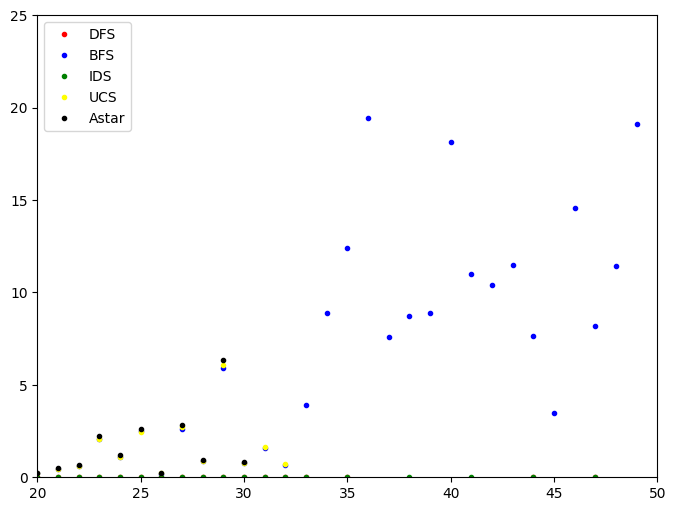

In [92]:
plt.figure(figsize=(8,6))
plt.ylim(0, 25)
plt.xlim(20, 50)
plt.plot(rec.iloc[:,0+5], '.', color='red')
plt.plot(rec.iloc[:,1+5], '.', color='blue')
plt.plot(rec.iloc[:,2+5], '.', color='green')
plt.plot(rec.iloc[:,3+5], '.', color='yellow')
plt.plot(rec.iloc[:,4+5], '.', color='black')
plt.legend(['DFS', 'BFS', 'IDS', 'UCS', 'Astar'])

In [93]:
rec.describe()

,DFSTime,BFSTime,IDSTime,UCSTime,AstarTime,DFSMemory,BFSMemory,IDSMemory,UCSMemory,AstarMemory
count,37.000000,50.000000,39.000000,33.000000,31.000000,37.000000,50.000000,39.000000,33.000000,31.000000
mean,5.955254,10.597640,8.903648,3.951902,3.577600,0.017111,4.114432,0.018208,0.627027,0.623731
std,3.643403,18.611458,14.701033,7.573441,10.823729,0.007120,5.693608,0.009111,1.223820,1.312028
min,0.532000,0.094000,0.218000,0.101000,0.099000,0.009680,0.002072,0.003152,0.003064,0.002096
25%,3.424413,0.163500,0.866500,0.135000,0.139500,0.012848,0.028616,0.011792,0.008408,0.007793
50%,5.155000,1.418000,1.707000,0.303000,0.317000,0.014608,0.719652,0.014224,0.081720,0.082431
75%,7.962000,15.112250,12.505500,3.298000,1.432173,0.017104,8.065610,0.021382,0.711192,0.561676
max,15.929469,93.769000,78.222872,28.583000,58.973423,0.036514,19.445424,0.037688,6.050853,6.344228
